In [2]:
"""import sys
!{sys.executable} -m pip install prophet"""

'import sys\n!{sys.executable} -m pip install prophet'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/wiki_machine_learning.csv"
df = pd.read_csv(url, sep=" ")





c:\Users\Lenovo\Desktop\ibhrbyu\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [4]:
df = df[df["count"] != 0]
df['date'] = pd.to_datetime(df['date'])


df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


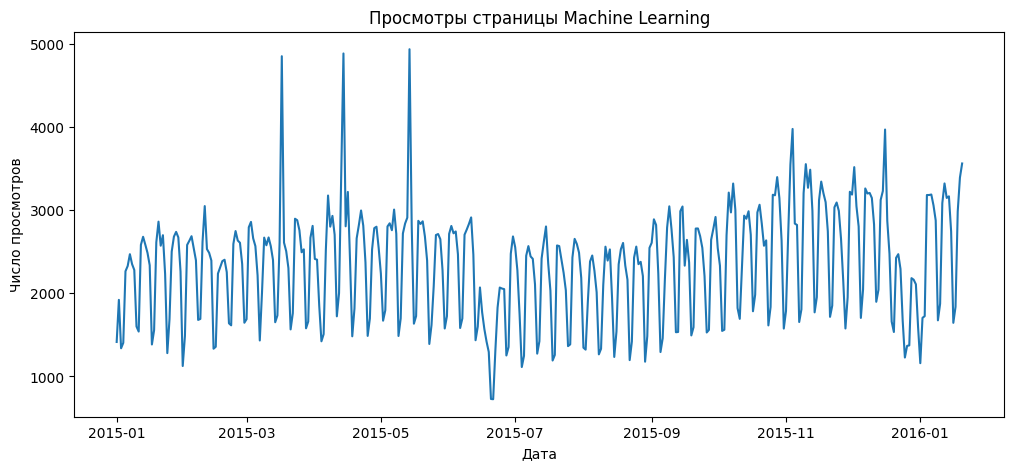

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['count'])
plt.title("Просмотры страницы Machine Learning")
plt.xlabel("Дата")
plt.ylabel("Число просмотров")
plt.show()


In [6]:
df_prophet = df[['date', 'count']].copy()
df_prophet.columns = ['ds', 'y']

predictions = 30
train_df = df_prophet[:-predictions].copy()
test_df = df_prophet[-predictions:].copy()


04:24:24 - cmdstanpy - INFO - Chain [1] start processing
04:24:24 - cmdstanpy - INFO - Chain [1] done processing


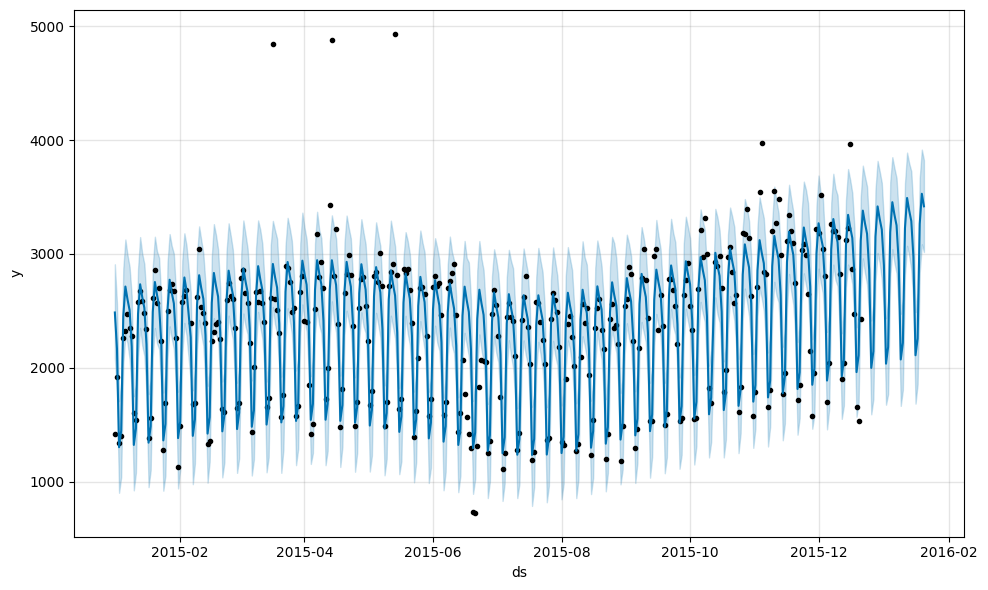

In [11]:
model = Prophet(daily_seasonality=True)
model.fit(train_df)


future = model.make_future_dataframe(periods=predictions)
forecast = model.predict(future)


fig = model.plot(forecast)
plt.show()


In [12]:
pred_date = pd.to_datetime('2015-01-20')
pred_value = int(forecast.loc[forecast['ds'] == pred_date, 'yhat'].values[0])
pred_value


2753

In [13]:
y_true = test_df['y'].values
y_pred = forecast['yhat'][-predictions:].values

mape = mean_absolute_percentage_error(y_true, y_pred) * 100
mae = mean_absolute_error(y_true, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")


MAPE: 34.21%
MAE: 593.65


In [14]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['count'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")


model_sarimax = sm.tsa.statespace.SARIMAX(df['count'], order=(1,1,1), seasonal_order=(1,1,1,7))
res = model_sarimax.fit()
print(res.summary())


ADF Statistic: -3.2889
p-value: 0.0154


c:\Users\Lenovo\Desktop\ibhrbyu\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Lenovo\Desktop\ibhrbyu\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             count   No. Observations:                  383
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2737.822
Date:                           Tue, 16 Dec 2025   AIC                           5485.644
Time:                                   04:24:25   BIC                           5505.278
Sample:                                        0   HQIC                          5493.439
                                           - 383                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5365      0.026     20.335      0.000       0.485       0.588
ma.L1         -1.0000      0.038    -26.221